# Olympics Historical Data Analytics

Xiaowen Shou
2024/06/28

## Introduction

This is a data analytics case study I found in Kaggle for me to practise data transformation, analysis and visualization.  
Data source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results  
Reference: https://www.kaggle.com/code/abdullahalmaharmeh/discover-about-olympics/notebook

With historical Olympic data, it is examined how global events have impacted the momentous occasion. Some interesting insights are uncovered, including:
* A concise overview of the history of Olympic games
* The reasons behind fluctuation in the number of participants over the years
* An examinaiton of the circumstances that led to previous cancellations of the games
* Political boycotts by countries that have impacted the games in the past
* An evaluation of hte performance of Arab athletes in the Olympics

Python libraries used: Pandas, NumkPy, Seaborn, and Marplotlib

## Overview on Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

##### Importing the data

In [2]:
olympic = pd.read_csv('.\\raw_data\\athlete_events.csv')
region =pd.read_csv('.\\raw_data\\noc_regions.csv')

In [3]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
olympic.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


From this view, several basic info:
* There are in total 271116 athletes included.
* Youngest athlete aged 10 and oldest 97 (are they valid ages?), average age 25.6 years old.
* Height range is 127-226cm, with average of 175cm.
* Height range is 25-214kg, with average of 70.7kg.
* Data covers the period of 1896-2016.

In [6]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
region.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


From this view, several basic info:
* Data shows that in total 203 NOC and 206 unique regions have participated in the Olympics game during 1896-2016.

## Data Cleaning and Pre-processing

The head of the Olympic data frame shows that:
* column "Games" is expanded into two columns "Season" and "Year", fine to drop this column.
* null values in columns "Age", "Weight", "Height", which should be non-null, while "Medal" column can null values as not all participants can win a medal.
* data only for the years when each Olympic game was held, try to get all. 

In region data frame:
* some null values in "region" column, why and if there is a way to deal with that or accept the null values.

##### Drop "Games" column in olympic dataframe

In [9]:
olympic.drop('Games', inplace=True, axis=1)

##### Look into the null values in "region" column in region dataframe

In [10]:
mask = region.region.isnull()
region[mask]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


3 records have null values in "region" column:  
1- ROT: The Refugee Olympic Team (ROT) is a team of refugee athletes, and as such, it does not represent any specific country or region. The team is composed of athletes who have been displaced from their home countries due to conflict, war, or persecution and are unable to compete for their original countries. so we can't fill it manually and we accept it .  
2- TUV: Tuvalu is a small island nation located in the Pacific Ocean. It is one of the smallest countries in the world in terms of land area and population, we can classify it into region "central Pacific Ocean".  
3- UNK: there are 2 competitors with this NOC. After research: they are considered as Unknown nations. Read more [here](https://www.olympedia.org/countries/UNK/editions/6)

In [11]:
region.loc[208, 'region'] = 'Central Pacific'

##### Merging two dataframes into one

In [12]:
oly = pd.merge(left = olympic, right = region, on = 'NOC', how = 'left')
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


##### Making column names consistent

In [13]:
oly.rename(columns = {'region': 'Region', 'notes': 'Notes'}, inplace = True)

In [14]:
oly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
 14  Region  270753 non-null  object 
 15  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


##### Duplicates check and treatment

In [15]:
if oly.duplicated().any():
    print("Duplicates exist in the dataframe. In total: ", oly.duplicated().sum())
else:
    print("No duplicates in the dataframe.")

Duplicates exist in the dataframe. In total:  1385


In [16]:
oly.drop_duplicates(inplace = True)

In [17]:
if oly.duplicated().any():
    print("Duplicates exist in the dataframe. In total: ", oly.duplicated().sum())
else:
    print("No duplicates in the dataframe.")

No duplicates in the dataframe.


##### Dealing with null values in "Age", "Weight", "Height"

In [18]:
#first, separate the Males from females because they have different measurements in weight and height
fem = oly[oly['Sex'] == 'F']
mal = oly[oly['Sex'] == 'M']

* Check the distribution of Age, Weight and Height to decide the best way to fill nan values.

Text(0.5, 1.0, 'Females Age')

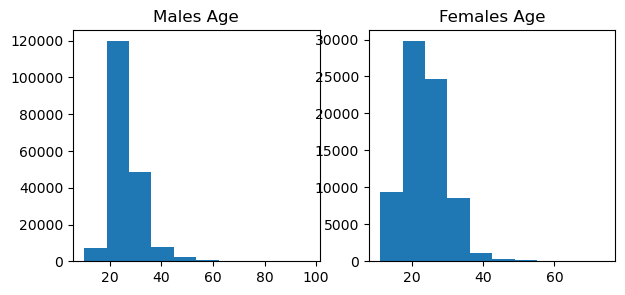

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].hist(mal['Age'])
ax[0].set_title('Males Age')
ax[1].hist(fem['Age'])
ax[1].set_title('Females Age')

Text(0.5, 1.0, 'Females Height')

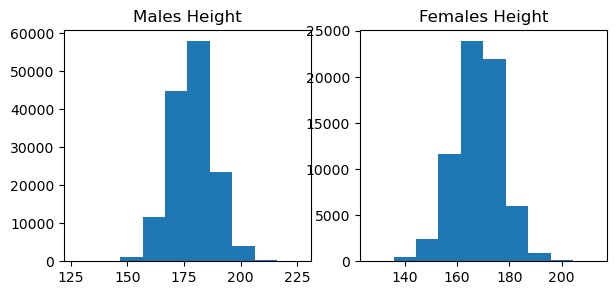

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].hist(mal['Height'])
ax[0].set_title('Males Height')
ax[1].hist(fem['Height'])
ax[1].set_title('Females Height')

Text(0.5, 1.0, 'Females Weight')

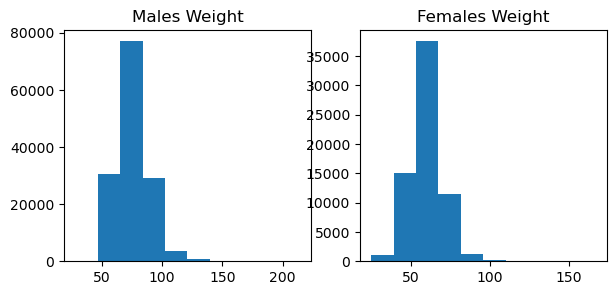

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].hist(mal['Weight'])
ax[0].set_title('Males Weight')
ax[1].hist(fem['Weight'])
ax[1].set_title('Females Weight')

The data are nearly symmetrical and not heavily skewed, so we can apply median/mean methos to fill the nan values.  
To be more accurate in this step, the list of sports will be used because some sports requires taller people, i.e. avarage height is larger.  
A funciton will be used to fill the values in each sport.

In [22]:
print("Median of male age: ",mal.Age.median())
print("Median of male height: ",mal.Height.median())
print("Median of male weight: ",mal.Weight.median())
print("Median of female age: ",fem.Age.median())
print("Median of female height: ",fem.Height.median())
print("Median of female weight: ",fem.Weight.median())

Median of male age:  25.0
Median of male height:  179.0
Median of male weight:  74.0
Median of female age:  23.0
Median of female height:  168.0
Median of female weight:  59.0


In [23]:
def age(df, li, num):
    for i in li: 
        if df[df['Sport'] == i]['Age'].isnull().all():     # check if all values are NaN 
            if num == 1:     # man
                m = 25
            else:            # woman
                m = 23
        else: 
            m = df[df['Sport'] == i]['Age'].median()      # calculate the median age of non-NaN records
        df.loc[df['Sport'] == i, 'Age'] = df. loc[df['Sport'] == i, 'Age'].fillna(m)

In [24]:
def heig(df, li, num):
    for i in li: 
        if df[df['Sport'] == i]['Height'].isnull().all():     # check if all values are NaN 
            if num == 1:     # man
                m = 179
            else:            # woman
                m = 168
        else: 
            m = df[df['Sport'] == i]['Height'].median()      # calculate the median height of non-NaN records
        df.loc[df['Sport'] == i, 'Height'] = df. loc[df['Sport'] == i, 'Height'].fillna(m)

In [25]:
def weig(df, li, num):
    for i in li: 
        if df[df['Sport'] == i]['Weight'].isnull().all():     # check if all values are NaN 
            if num == 1:     # man
                m = 74
            else:            # woman
                m = 59
        else: 
            m = df[df['Sport'] == i]['Weight'].median()      # calculate the median height of non-NaN records
        df.loc[df['Sport'] == i, 'Weight'] = df. loc[df['Sport'] == i, 'Weight'].fillna(m)

In [26]:
fsport = list(fem.Sport.unique())
msport = list(mal.Sport.unique())

* Male NaN data filling

In [27]:
age(mal, msport, 1)
heig(mal, msport, 1)
weig(mal, msport, 1)

* Female NaN data filling

In [28]:
age(fem, fsport, 2)
heig(fem, fsport, 2)
weig(fem, fsport, 2)

In [29]:
mal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195353 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      195353 non-null  int64  
 1   Name    195353 non-null  object 
 2   Sex     195353 non-null  object 
 3   Age     195353 non-null  float64
 4   Height  195353 non-null  float64
 5   Weight  195353 non-null  float64
 6   Team    195353 non-null  object 
 7   NOC     195353 non-null  object 
 8   Year    195353 non-null  int64  
 9   Season  195353 non-null  object 
 10  City    195353 non-null  object 
 11  Sport   195353 non-null  object 
 12  Event   195353 non-null  object 
 13  Medal   28519 non-null   object 
 14  Region  195124 non-null  object 
 15  Notes   4134 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 25.3+ MB


In [30]:
fem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74378 entries, 4 to 271110
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74378 non-null  int64  
 1   Name    74378 non-null  object 
 2   Sex     74378 non-null  object 
 3   Age     74378 non-null  float64
 4   Height  74378 non-null  float64
 5   Weight  74378 non-null  float64
 6   Team    74378 non-null  object 
 7   NOC     74378 non-null  object 
 8   Year    74378 non-null  int64  
 9   Season  74378 non-null  object 
 10  City    74378 non-null  object 
 11  Sport   74378 non-null  object 
 12  Event   74378 non-null  object 
 13  Medal   11253 non-null  object 
 14  Region  74244 non-null  object 
 15  Notes   901 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 9.6+ MB


* Missing values are solved. There are no missing values in the dataframe except for the note and medal column.

In [31]:
# Merge to the original dataset
oly = pd.concat([mal, fem])

In [32]:
oly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271110
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  float64
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Year    269731 non-null  int64  
 9   Season  269731 non-null  object 
 10  City    269731 non-null  object 
 11  Sport   269731 non-null  object 
 12  Event   269731 non-null  object 
 13  Medal   39772 non-null   object 
 14  Region  269368 non-null  object 
 15  Notes   5035 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.0+ MB


## Data Visulization

#### Historical Overview

In [33]:
g = oly.groupby('Season')
summer_oly = g.get_group('Summer')
winter_oly = g.get_group('Winter')

In [34]:
grouped = summer_oly.groupby('Year')['ID'].nunique().reset_index(name = 'count')
groupedw = winter_oly.groupby('Year')['ID'].nunique().reset_index(name = 'count')

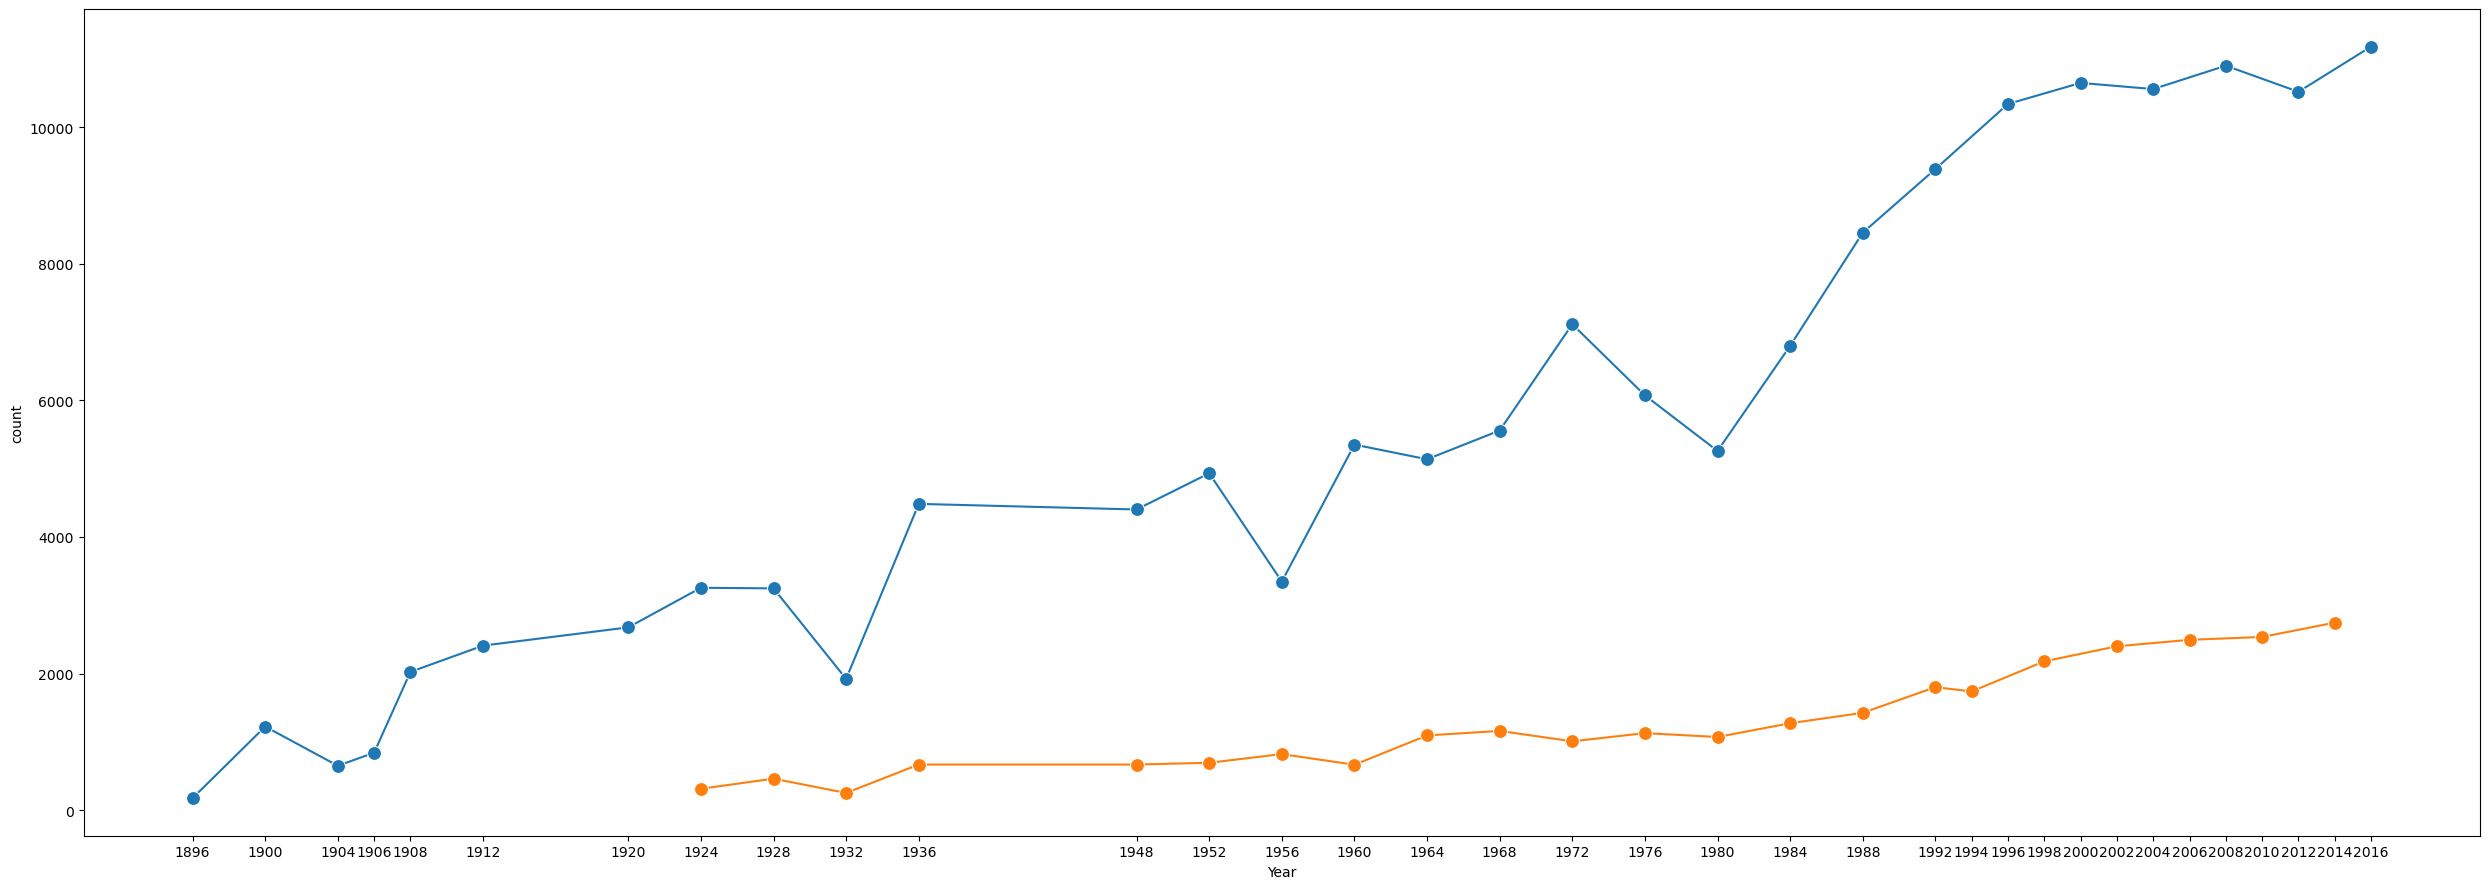

In [35]:
plt.figure(figsize = (25,9))
sns.lineplot(x = grouped['Year'], y = grouped['count'], marker = 'o', markersize = 10)
sns.lineplot(x = groupedw['Year'], y = groupedw['count'], marker = 'o', markersize = 10)
plt.xticks(oly.Year.unique())
plt.tight_layout()

In [36]:
grouped = summer_oly.groupby('Year')['NOC'].nunique().reset_index(name = 'Nation')
groupedw = winter_oly.groupby('Year')['NOC'].nunique().reset_index(name = 'Nation')

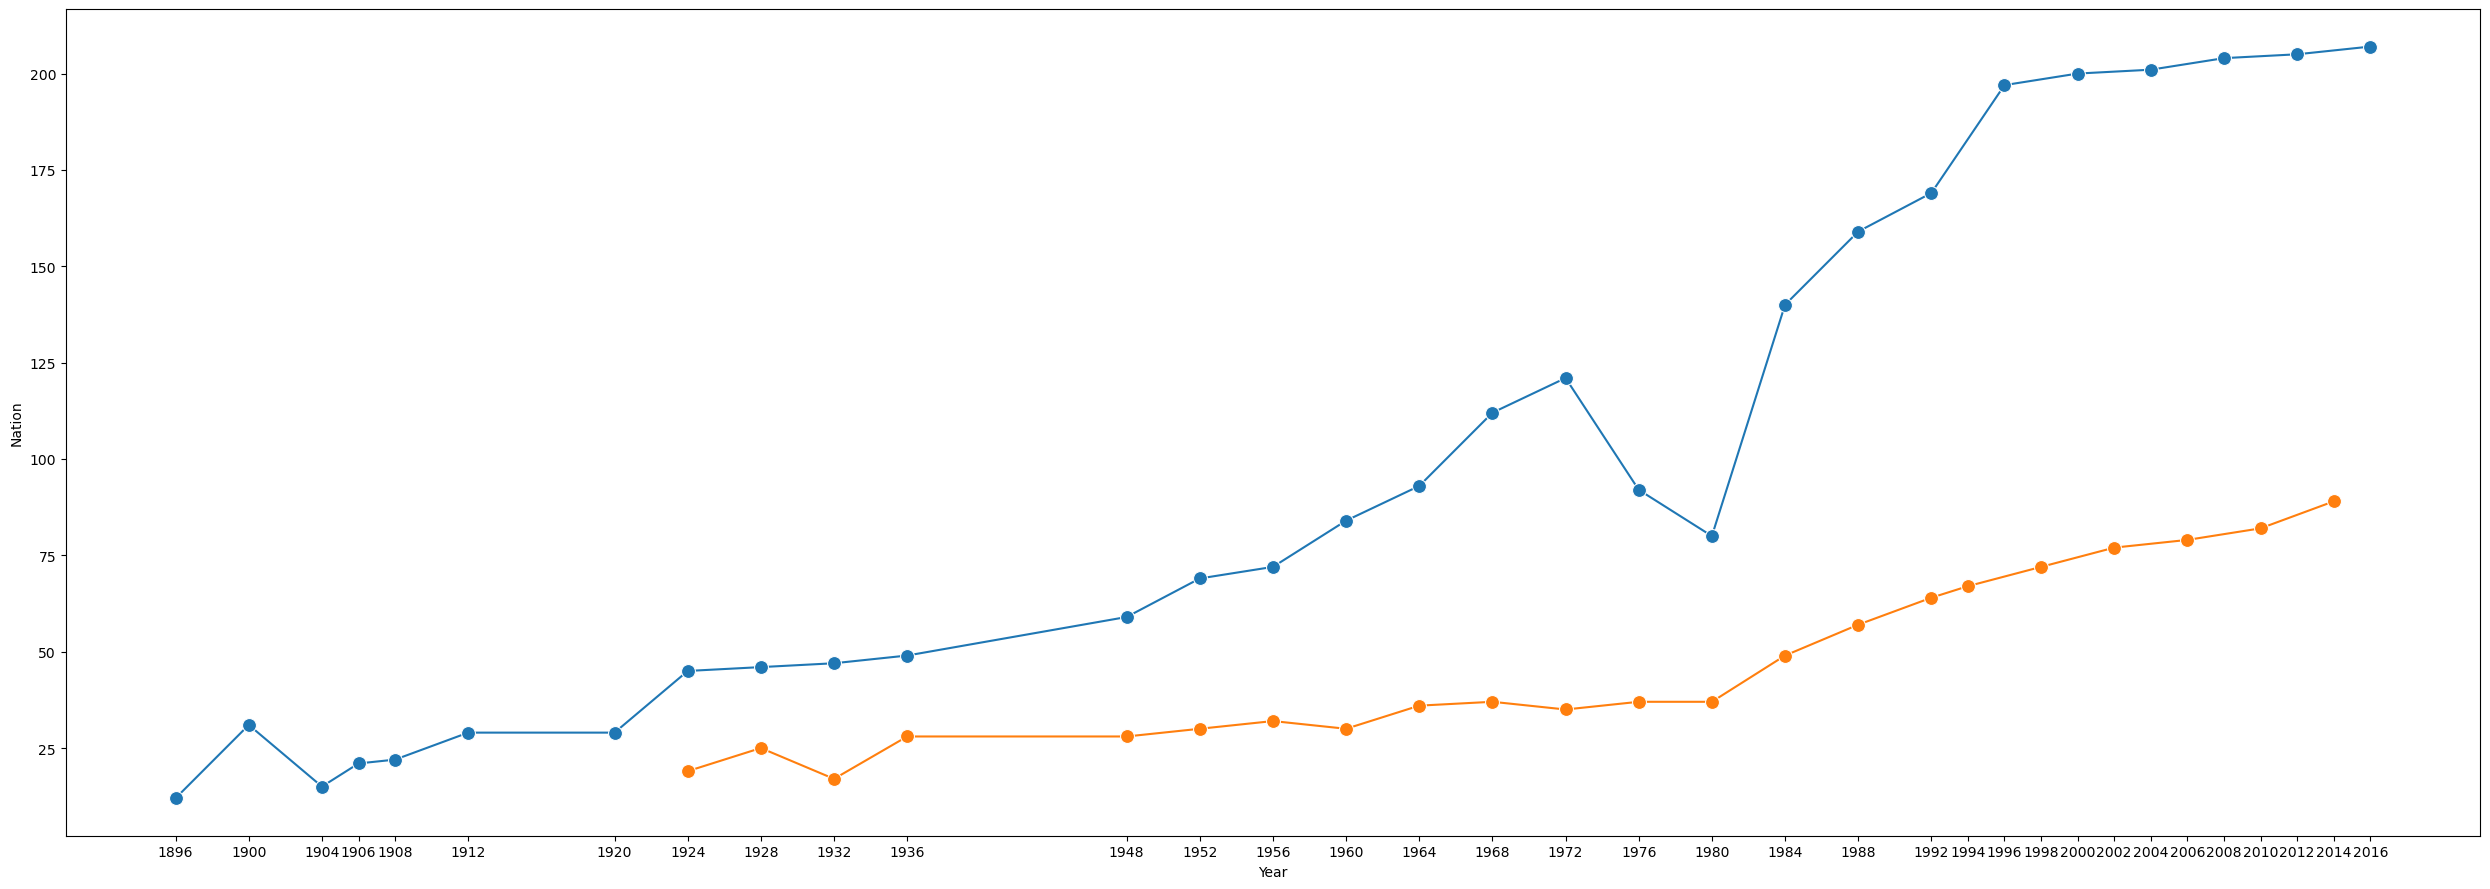

In [37]:
plt.figure(figsize = (25,9))
sns.lineplot(x = grouped['Year'], y = grouped['Nation'], marker = 'o', markersize = 10)
sns.lineplot(x = groupedw['Year'], y = groupedw['Nation'], marker = 'o', markersize = 10)
plt.xticks(oly.Year.unique())
plt.tight_layout()

In the two plots, some strange values generate questions:  

##### Why Olympics in 1900 have a huge number of nations participated in?  
1900 Olympic Games in Paris had a huge amount of participants because they were held in conjunction with the 1900 World's Fair, which attracted millions of visitors from around the world. As a result, many athletes from different countries who were already attending the World's Fair decided to compete in the Olympic events as well.  
Additionally, 1900 Olympics featured a wide range of events, including some that were not traditional athletic competitions, such as the art competitions and exhibitions, which attracted participants from various fields of arts and sciences.


##### What is the main reason for decreasing in the number of teams at 1906 Olympics?  
There was no official Olympic Games held in 1906!!!!!!!  
The 1906 Intercalated Games were held just two years after the 1904 Olympics, which may have made it difficult for some athletes to prepare and attend both events.  
The International Olympic Committee did not officially recognize the 1906 Intercalated Games, which may have reduced the level of interest and participation from some countries and athletes.

##### What is the reason for the interruption between 1912 and 1920??  
1916 Olympics were scheduled to be held in Berlin, Germany, but were cancelled due to World War I, which started in 1914. The war disrupted international travel and made it difficult for countries to send athletes to compete in the games.

##### What's the reason for the interruption between 1936 and 1948?  
No Olympic Games held during this period due to the effects of World War II. The 1940 Summer Olympics and Winter Olympics, which were scheduled to be held in Tokyo, Japan, and Sapporo, Japan, respectively, were cancelled due to the outbreak of World War II. The 1944 Summer Olympics and Winter Olympics, which were scheduled to be held in London, England, and Cortina d'Ampezzo, Italy, respectively, were also cancelled due to the war.

##### What about 1960 Olympic games?  
1960 Summer Olympics, also known as the Games of the XVII Olympiad, were held in Rome, Italy. It was notable for a few reasons.  
Firstly,it was the first Olympics to be televised on a large scale, with many events broadcast live to television audiences around the world. This helped to increase the popularity and exposure of the Olympics to a wider audience.  
Secondly, it was notable for a number of standout performances by athletes. Some of the most notable performances included those of Ethiopian runner Abebe Bikila, who won the marathon while running barefoot, and American boxer Cassius Clay (later known as Muhammad Ali), who won the light-heavyweight boxing gold medal.

##### What about 1980 Olympic games?  
Olympic 1980 was held in Moscow, the capital of the Soviet Union. 1980 Olympics was notable for a number of reasons.  
Firstly, it was the first Olympic Games to be held in a socialist country.  
Secondly, it was marred by controversy when the United States and many other Western countries decided to boycott the games in protest of the Soviet Union's invasion of Afghanistan in 1979. so we can see the number of nation was decreased.

#### Medals and recordes in Olympic

Oldest male and female who participated in the Olympics.

In [38]:
fag = fem.Age.max()
mag = mal.Age.max()
fem[fem['Age']==fag]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region,Notes
201631,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,160.0,59.0,France,FRA,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN


In [39]:
mal[mal['Age']==mag]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region,Notes
257054,128719,John Quincy Adams Ward,M,97.0,175.0,76.0,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


It makes sense because they attended in art competitions which is not related to body and health.

In [40]:
gold_s = summer_oly[summer_oly['Medal']=='Gold']
gold_w = winter_oly[winter_oly['Medal']=='Gold']

Text(0.5, 1.0, 'Distribution of Summer Gold Medals')

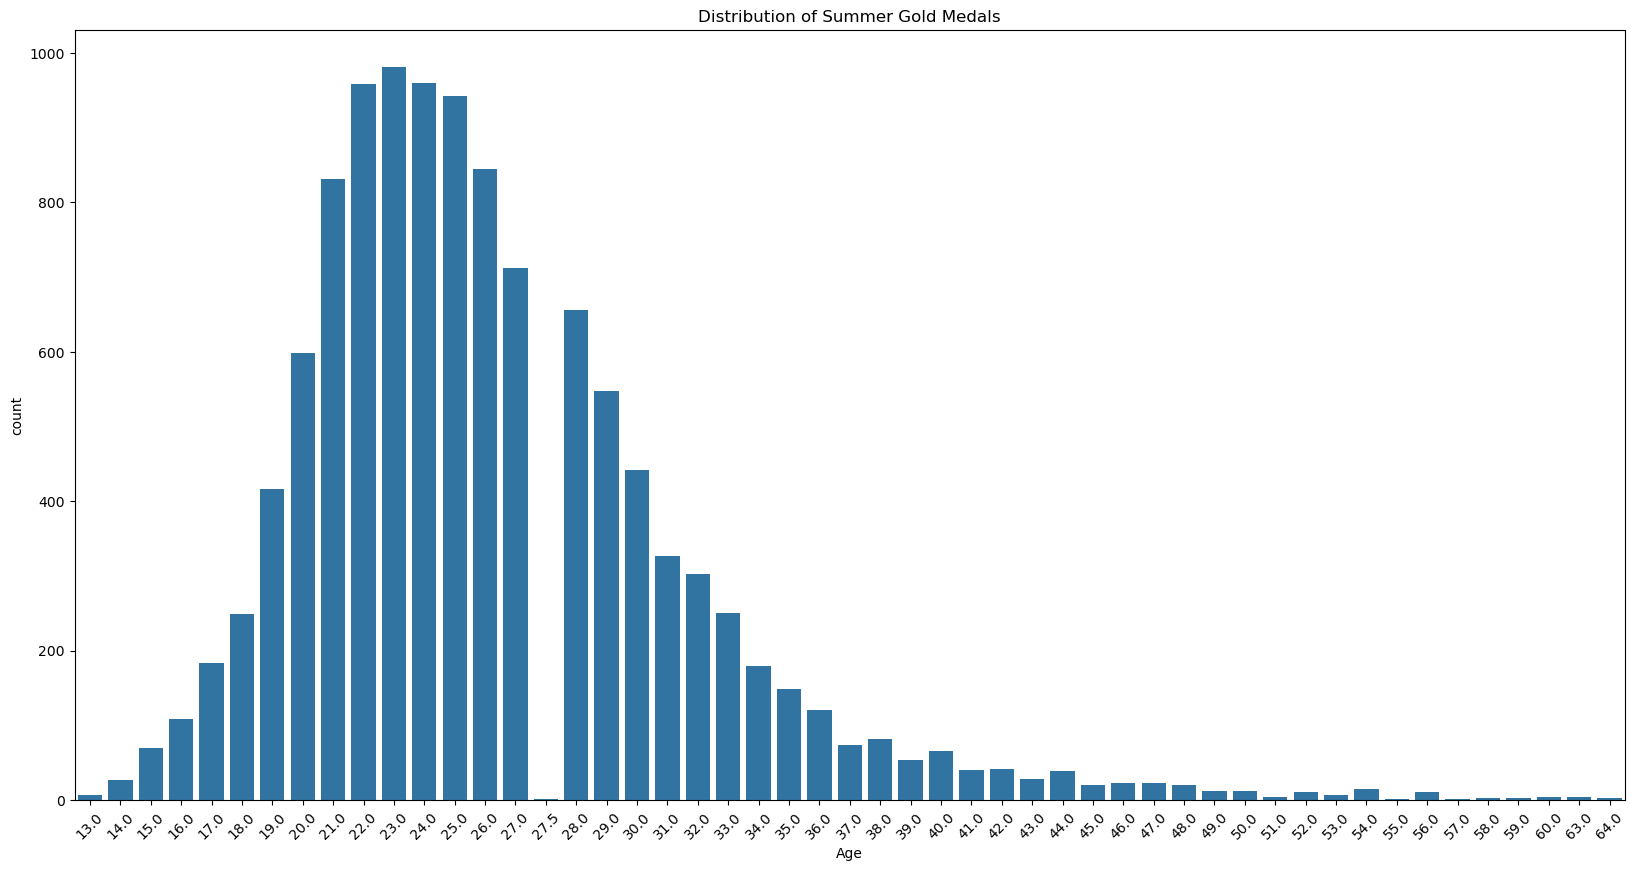

In [41]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(x=gold_s.Age)
plt.xticks(rotation=45)
plt.title('Distribution of Summer Gold Medals')

Text(0.5, 1.0, 'Distribution of Winter Gold Medals')

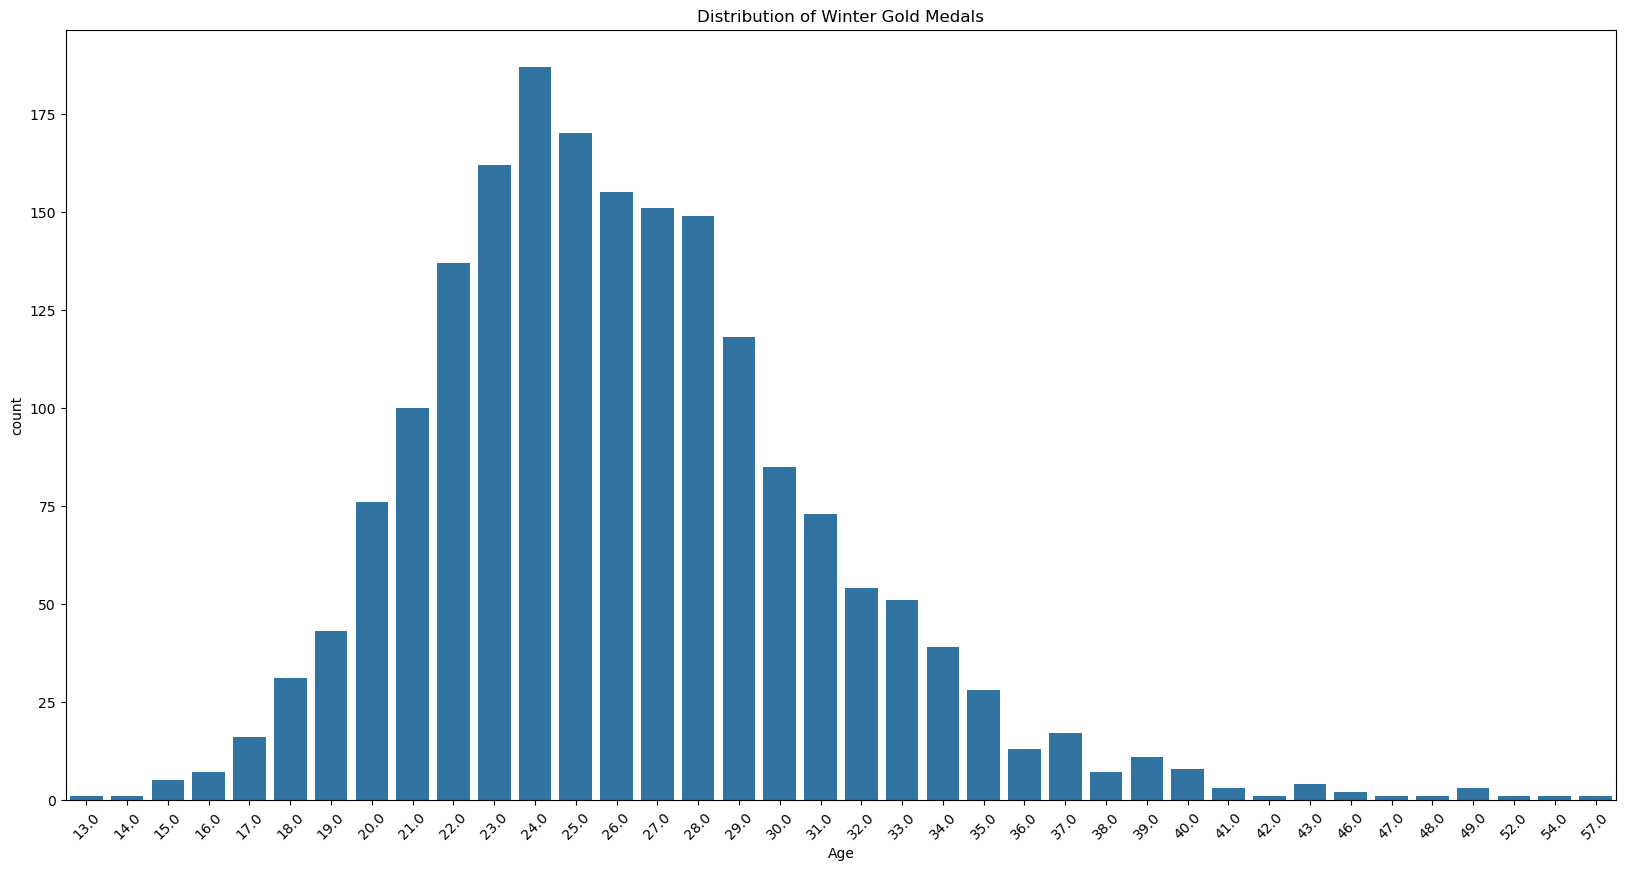

In [42]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(x=gold_w.Age)
plt.xticks(rotation=45)
plt.title('Distribution of Winter Gold Medals')

For gold medals, more old people win it in summer than in winter.

##### Medals in each country.

In [43]:
print('Top 10 countries in Summer Olympic')
gold_s.Region.value_counts().reset_index(name='Medal').head(10)

Top 10 countries in Summer Olympic


,Region,Medal
0,USA,2472
1,Russia,1220
2,Germany,1075
3,UK,635
4,Italy,518
5,France,463
6,Hungary,432
7,Australia,362
8,Sweden,354
9,China,335


In [44]:
print('Top 10 countries in Winter Olympic')
gold_w.Region.value_counts().reset_index(name='Medal').head(10)

Top 10 countries in Winter Olympic


,Region,Medal
0,Russia,379
1,Canada,305
2,Germany,226
3,USA,166
4,Norway,151
5,Sweden,125
6,Austria,79
7,Switzerland,76
8,Finland,66
9,Italy,57


It indicates that Russia is better in Winter game thans the USA because Russia is a vast country with many regions that experience long, cold winters, which can provide ideal conditions for winter sports such as ice hockey, figure skating, skiing, and biathlon. Additionally, Russia has invested heavily in developing its winter sports infrastructure and training facilities, which can help its athletes perform at a high level.

#### Arabs in Olympic Games

In [45]:
# create list for Arabs NOC
arab_nocs = ['ALG', 'BRN', 'COM', 'DJI', 'EGY', 'IRQ', 'JOR', 'KUW', 'LIB', 'LBA', 'MTN', 'MAR', 'OMA', 'PLE', 'QAT', 'KSA', 'SOM', 'SUD', 'SYR', 'TUN', 'UAE', 'YEM']
# create a data frame for arabs only
arab = oly[oly['NOC'].isin(arab_nocs)]

In [46]:
arab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5615 entries, 134 to 270447
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5615 non-null   int64  
 1   Name    5615 non-null   object 
 2   Sex     5615 non-null   object 
 3   Age     5615 non-null   float64
 4   Height  5615 non-null   float64
 5   Weight  5615 non-null   float64
 6   Team    5615 non-null   object 
 7   NOC     5615 non-null   object 
 8   Year    5615 non-null   int64  
 9   Season  5615 non-null   object 
 10  City    5615 non-null   object 
 11  Sport   5615 non-null   object 
 12  Event   5615 non-null   object 
 13  Medal   109 non-null    object 
 14  Region  5615 non-null   object 
 15  Notes   0 non-null      object 
dtypes: float64(3), int64(2), object(11)
memory usage: 745.7+ KB


##### Which country participated most in Olympics?

<Axes: xlabel='Region', ylabel='count'>

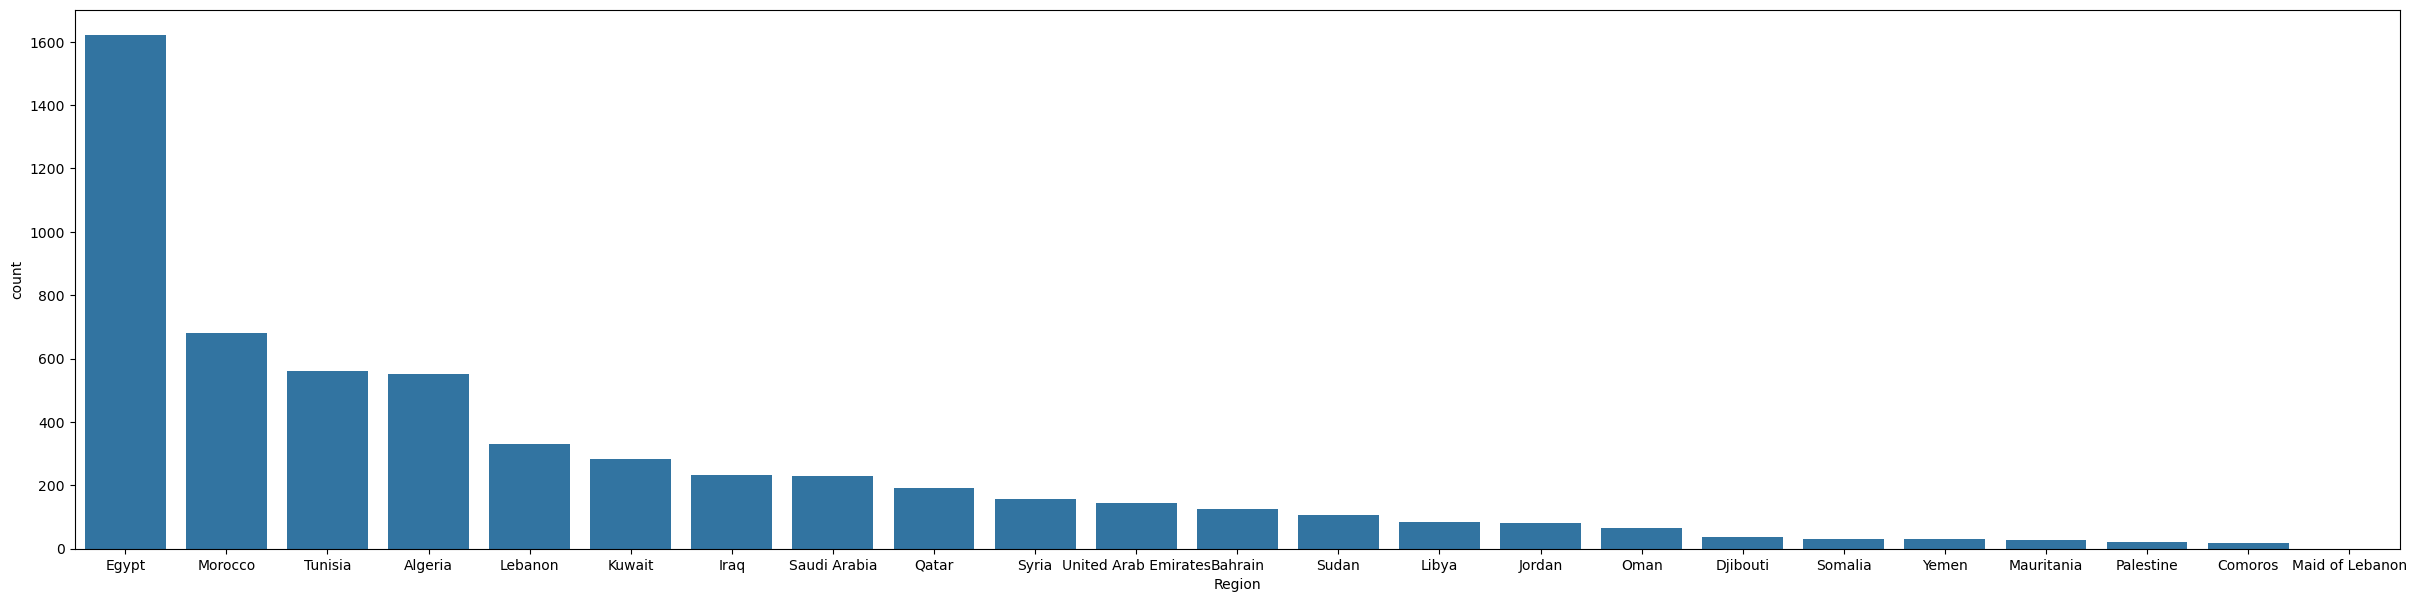

In [47]:
plt.figure(figsize=(30,7))
plt.tight_layout()
sns.countplot(data=arab, x='Region', order=arab.Team.value_counts().index)

Egypt participated most in the arab countries.

##### Which country earned the most medals?

In [48]:
winners = arab[arab.Medal.notnull()]
print("The number of medal arabs got until 2016 = ", winners.shape[0])
print("The percentage of winning is = ", winners.shape[0]/arab.shape[0])

The number of medal arabs got until 2016 =  109
The percentage of winning is =  0.019412288512911845


<Axes: xlabel='Region', ylabel='count'>

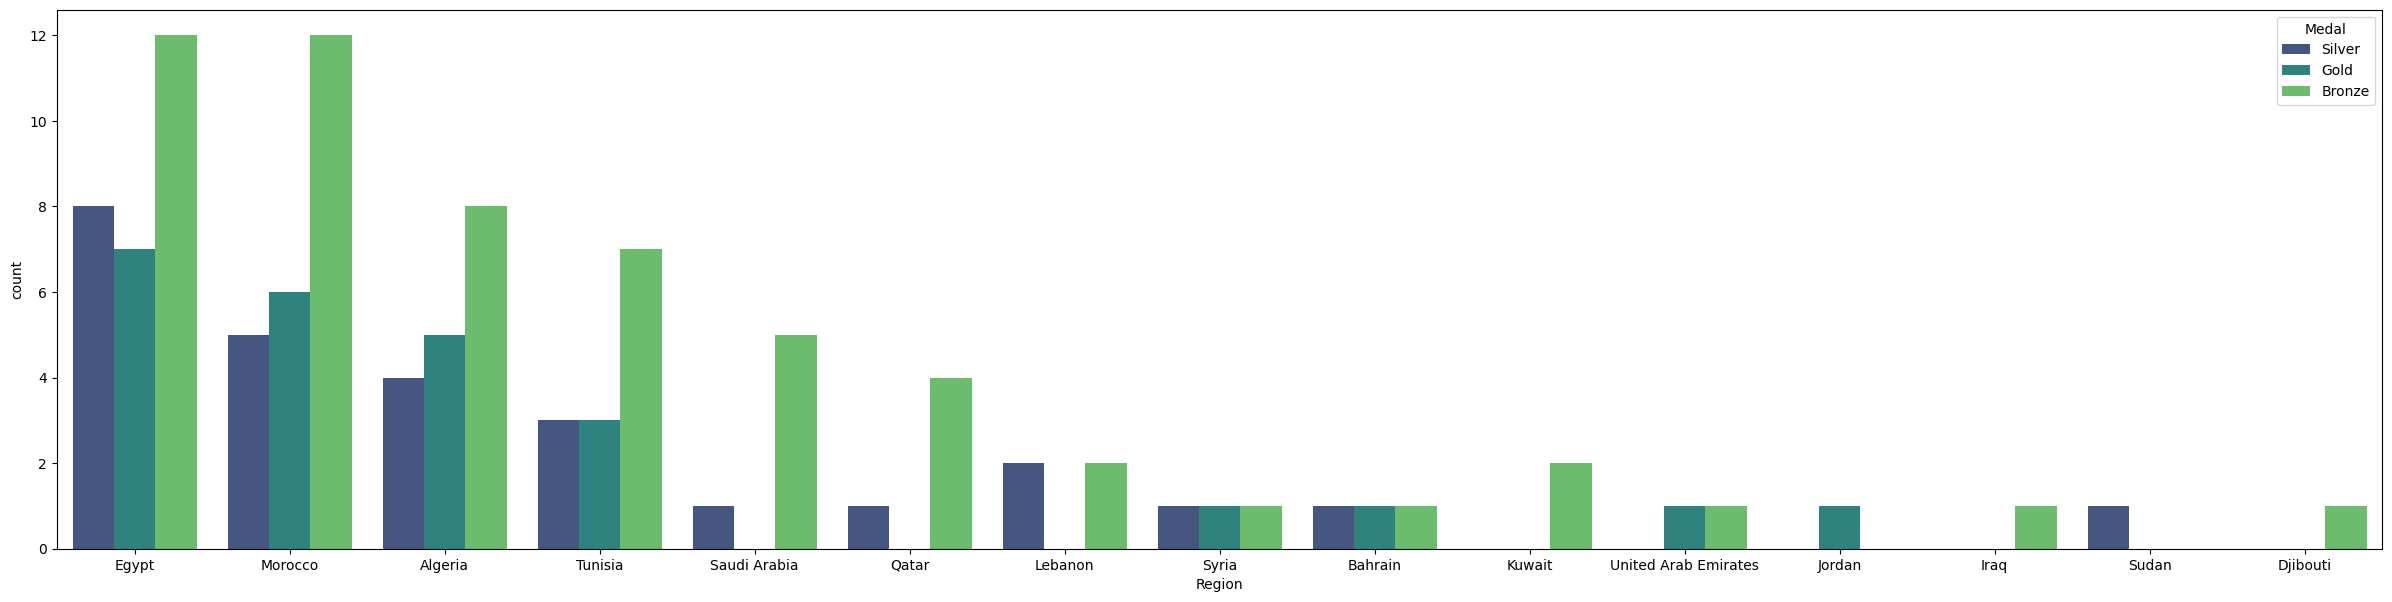

In [49]:
medal_counts = winners['Region'].value_counts().sort_values(ascending = False)
ordered_regions = medal_counts.index.tolist()
plt.figure(figsize = (30,7))
plt.tight_layout()
sns.countplot(data = winners, x = 'Region', hue = 'Medal', order = ordered_regions, palette = 'viridis')

##### Sport that arabs win medals in?

In [50]:
winners.Sport.value_counts().reset_index(name = 'Medal')

,Sport,Medal
0,Athletics,43
1,Boxing,16
2,Weightlifting,14
3,Wrestling,11
4,Equestrianism,5
5,Judo,5
6,Taekwondo,4
7,Shooting,4
8,Swimming,3
9,Fencing,2


##### Gender distribution in arabs olympic history

Text(0.5, 1.0, 'Gender Distribution of all arab countries')

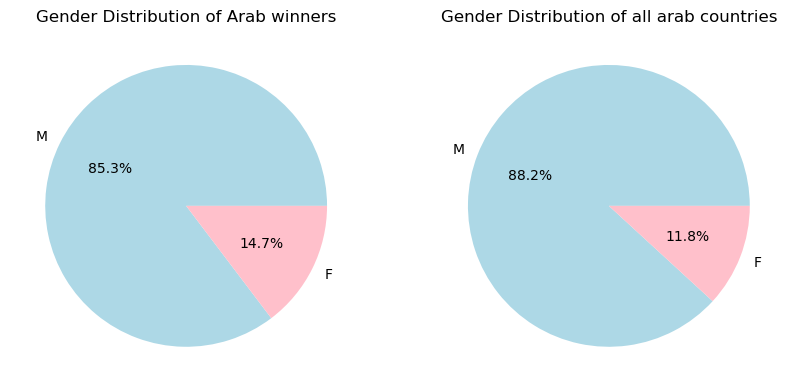

In [51]:
fig, (ax1, ax2) = plt. subplots(1, 2, figsize = (10,5))
ax1.pie(winners.Sex.value_counts(), labels = winners.Sex.value_counts().index, colors = ['lightblue', 'pink'], autopct = '%1.1f%%')
ax1.set_title('Gender Distribution of Arab winners')
ax2.pie(arab.Sex.value_counts(), labels = arab.Sex.value_counts().index, colors = ['lightblue', 'pink'], autopct = '%1.1f%%')
ax2.set_title('Gender Distribution of all arab countries')

##### Best years for Arabs

<Axes: xlabel='Year', ylabel='count'>

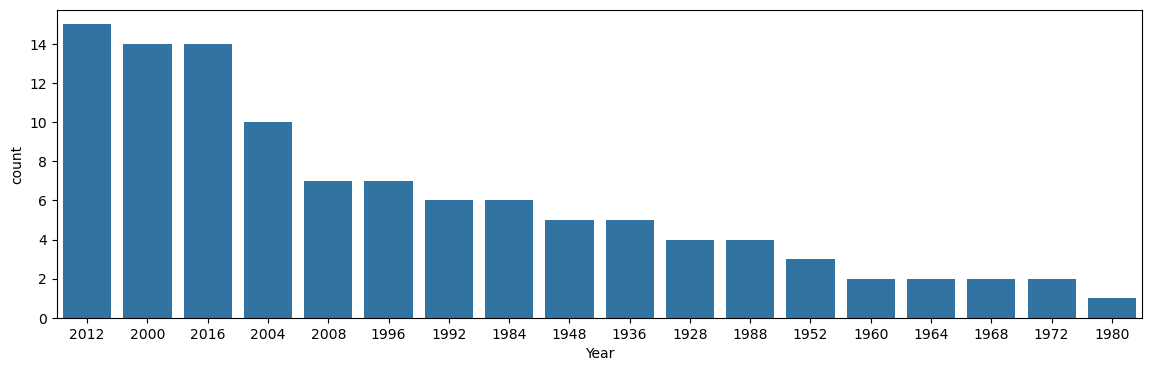

In [52]:
plt.figure(figsize = (14,4))
sns.countplot(x = winners.Year, order = winners.Year.value_counts().index)

Dig into this year:

In [53]:
year_spe = winners[winners['Year']==2012]

<Axes: xlabel='Region', ylabel='count'>

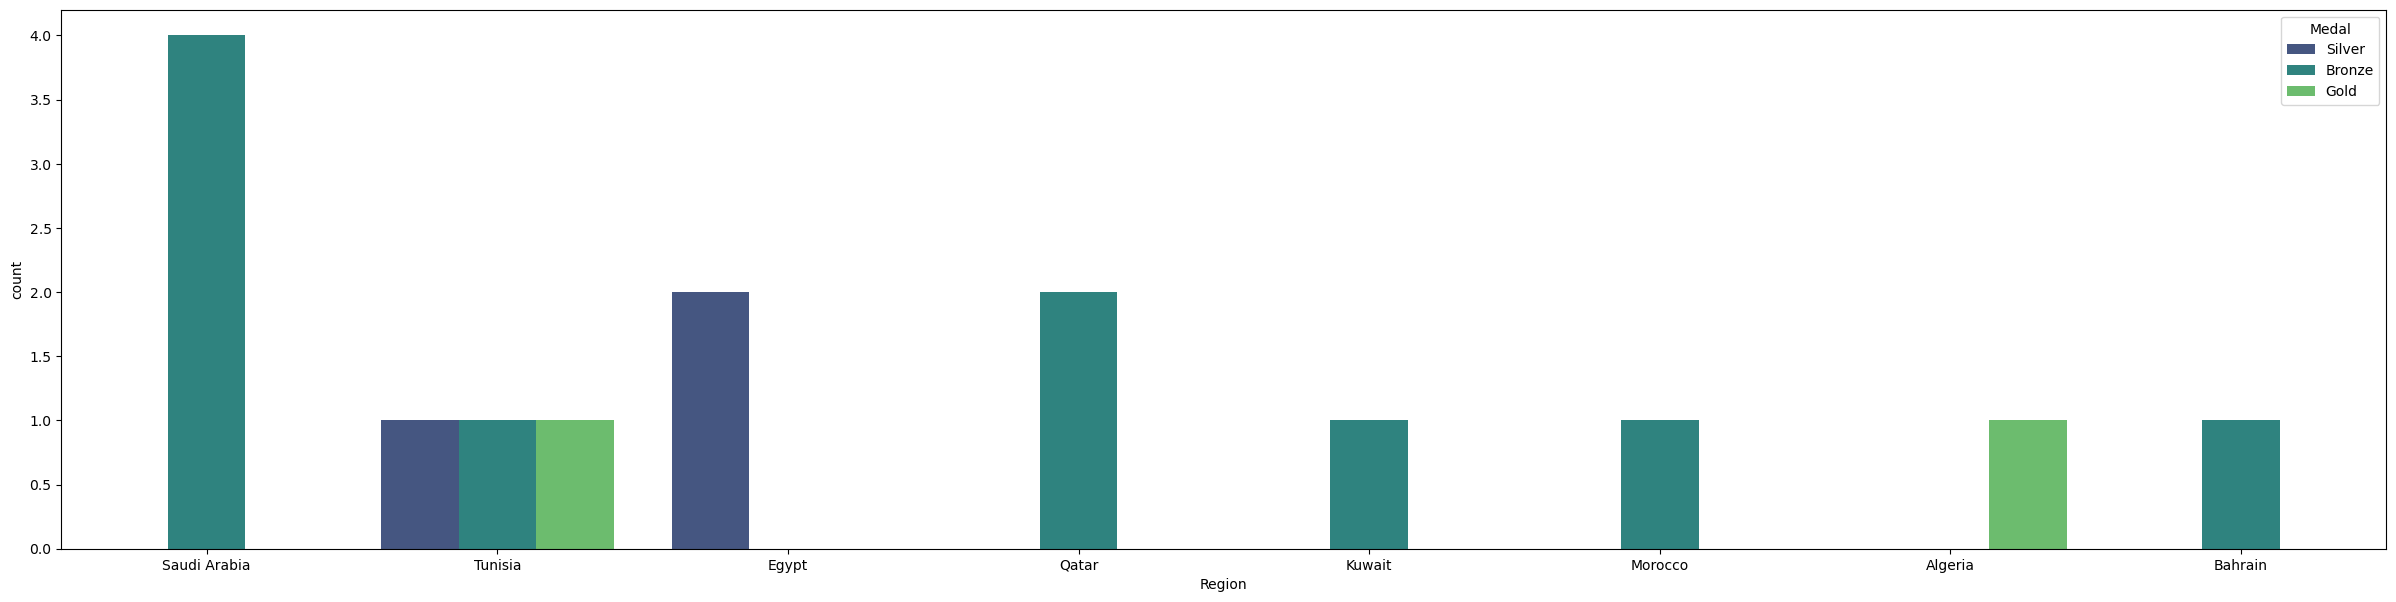

In [54]:
medal_counts = year_spe['Region'].value_counts(ascending=False)
ordered_regions = medal_counts.index.tolist()
plt.figure(figsize=(30,7))
plt.tight_layout()
sns.countplot(data = year_spe, x = 'Region', hue = 'Medal', order = ordered_regions, palette = 'viridis')

Saudi Arabia got the most medals in that year and Tunisia the second.

In [55]:
m = arab.Year.min()
print("The first year Arabs show up in the Olympics", m)

arab[arab['Year']==m]

The first year Arabs show up in the Olympics 1906


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region,Notes
43632,22499,Eugenio Colombani,M,25.0,172.0,74.0,Egypt,EGY,1906,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,Egypt,NaN
43633,22499,Eugenio Colombani,M,24.0,178.0,72.0,Egypt,EGY,1906,Summer,Athina,Cycling,Cycling Men's Sprint,NaN,Egypt,NaN
43634,22499,Eugenio Colombani,M,24.0,178.0,72.0,Egypt,EGY,1906,Summer,Athina,Cycling,Cycling Men's 20 kilometres,NaN,Egypt,NaN
189649,95250,Arthur Pitt-Marson,M,25.0,180.0,71.0,Egypt,EGY,1906,Summer,Athina,Athletics,Athletics Men's 5 mile,NaN,Egypt,NaN
189650,95250,Arthur Pitt-Marson,M,25.0,180.0,71.0,Egypt,EGY,1906,Summer,Athina,Athletics,Athletics Men's Marathon,NaN,Egypt,NaN


All of them were from Egypt!

#### Go back to full data sample and examine the relationship between some features in the data frame.

The relationship between the number of times an athlete has participated in the Olympics and the number of medals they have won.

Text(0.5, 1.0, 'Medals v.s. Participations')

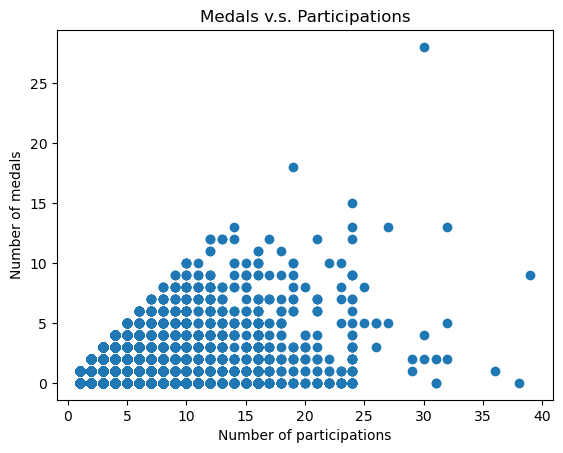

In [56]:
medal_counts = oly.groupby('ID')['Medal'].count()
participation_counts = oly.groupby('ID')['Medal'].size()
plt.scatter(participation_counts, medal_counts)
plt.xlabel('Number of participations')
plt.ylabel('Number of medals')
plt.title('Medals v.s. Participations')

In [57]:
corr_coeff = participation_counts.corr(medal_counts)
print ("Correlation coefficient: ", corr_coeff)

Correlation coefficient:  0.3576407273513638


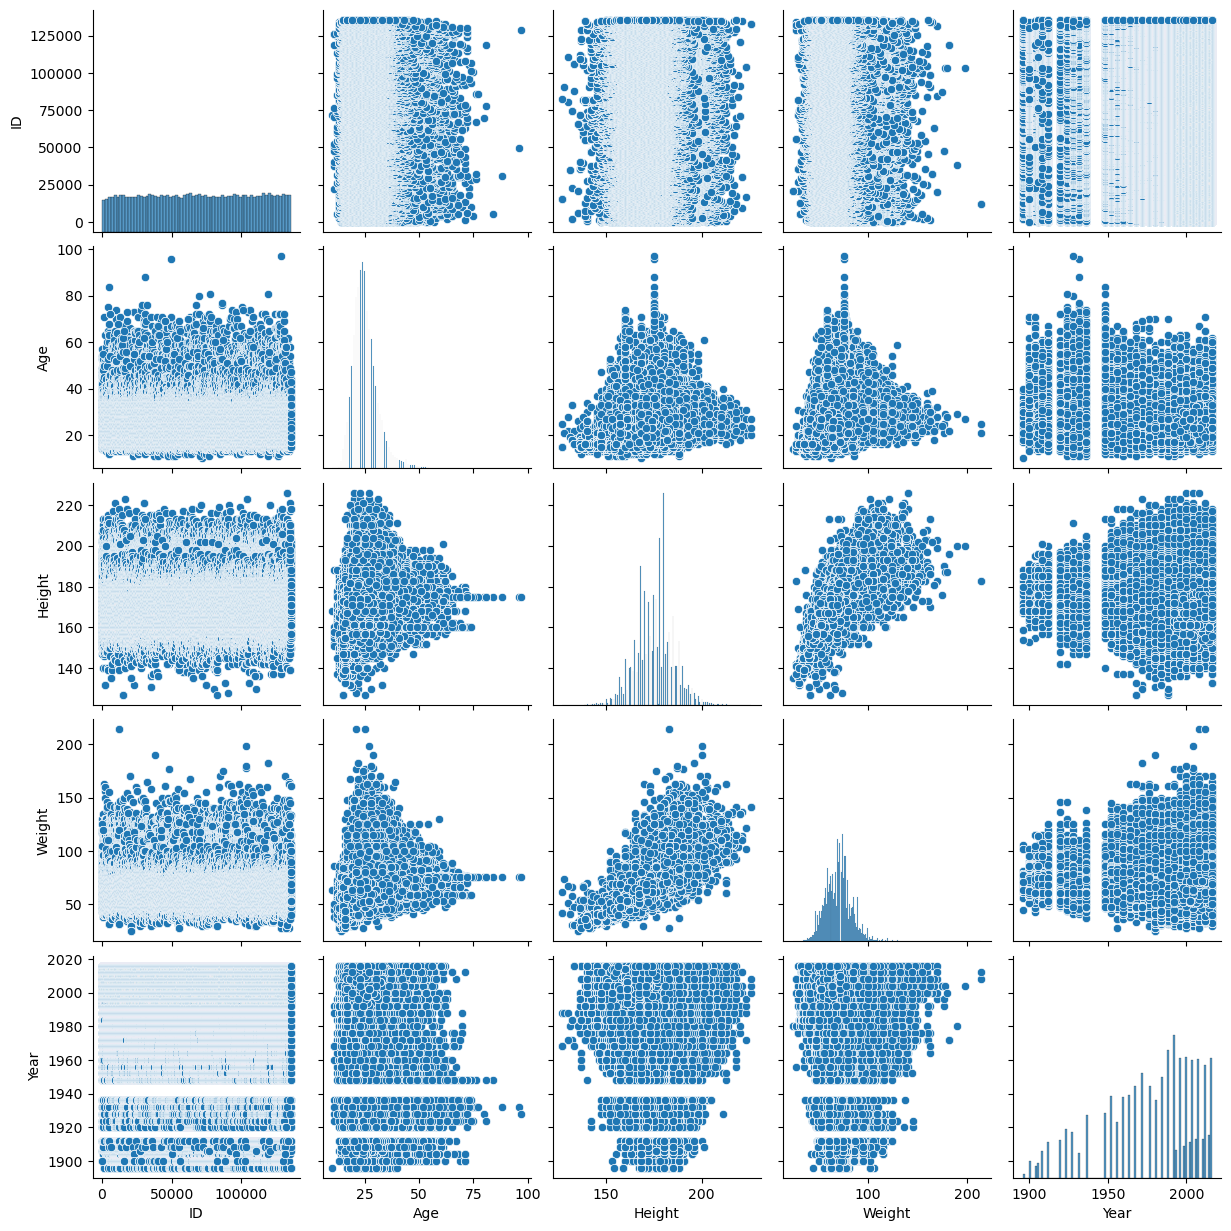

In [58]:
sns.pairplot(oly)

## Conclusion

This analysis process provides valuable insights into the history of the Olympic Games and how it has been influenced by various global events. Patterns and trends are identified in the data and meaningful conclusions are drawn to answer the research questions.  

As any project, there is always room for improvement. In the future, the analysis can be expanded by incorporating additional data sources, exploring new research questions, and leveraging more advanced analytical techniques. The presentation and visualization of the findings can also be improved, potentially by creating a report using Power BI.  

Overall, this project has demonstrated the power of data analysis in uncovering insights and informing decision-making. Hope that the findings will contribute to a deeper understanding of the history and evolution of the Olympic games, and provide a basis for future research in this area.